In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate random sample data
np.random.seed(42)
n_samples = 1000
n_features = 5
n_targets = 3

X = np.random.rand(n_samples, n_features)
y = np.random.rand(n_samples, n_targets)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for constant leaf tree model
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'num_threads': 4,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'min_sum_hessian_in_leaf': 1e-3
}

# Train a separate model for each target
models = []
for i in range(n_targets):
    print(f"Training model for target {i+1}")
    target_train = lgb.Dataset(X_train, label=y_train[:, i])
    target_test = lgb.Dataset(X_test, label=y_test[:, i], reference=target_train)

    model = lgb.train(params, target_train, num_boost_round=100, valid_sets=[target_test])
    models.append(model)

# Make predictions
y_pred = np.column_stack([model.predict(X_test) for model in models])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
for i, model in enumerate(models):
    print(f"\nFeature importance for target {i+1}:")
    feature_importance = model.feature_importance()
    for j, importance in enumerate(feature_importance):
        print(f"Feature {j+1}: {importance}")

# Save models
for i, model in enumerate(models):
    model.save_model(f'lightgbm_model_target_{i+1}.txt')

print("\nModels saved successfully.")

import json

# Assuming 'model' is your trained LightGBM model
model_json = model.dump_model()

# Save to a file
with open('model.json', 'w') as f:
    json.dump(model_json, f, indent=4)

Training model for target 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

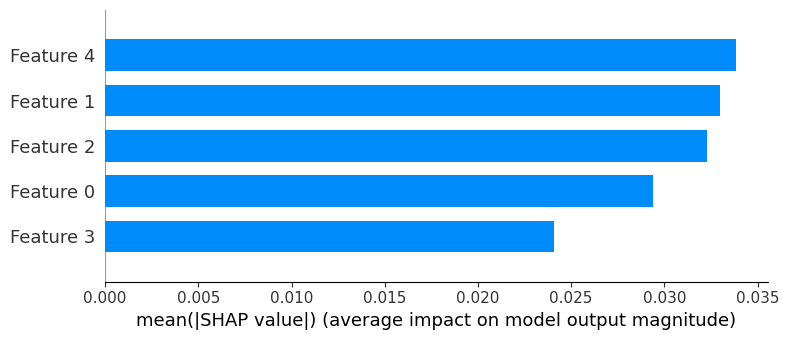

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for your dataset
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate random sample data
np.random.seed(42)
n_samples = 1000
n_features = 5
n_targets = 3

X = np.random.rand(n_samples, n_features)
y = np.random.rand(n_samples, n_targets)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for linear leaf tree model
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'num_threads': 4,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'min_sum_hessian_in_leaf': 1e-3,
    # Add these parameters for linear tree
    'linear_tree': True,  # Enable linear tree
    'linear_lambda': 0.01  # L2 regularization for linear model in leaves
}

# Train a separate model for each target
models = []
for i in range(n_targets):
    print(f"Training model for target {i+1}")
    target_train = lgb.Dataset(X_train, label=y_train[:, i])
    target_test = lgb.Dataset(X_test, label=y_test[:, i], reference=target_train)

    model = lgb.train(params, target_train, num_boost_round=100, valid_sets=[target_test])
    models.append(model)

# Make predictions
y_pred = np.column_stack([model.predict(X_test) for model in models])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
for i, model in enumerate(models):
    print(f"\nFeature importance for target {i+1}:")
    feature_importance = model.feature_importance()
    for j, importance in enumerate(feature_importance):
        print(f"Feature {j+1}: {importance}")

# Save models
for i, model in enumerate(models):
    model.save_model(f'lightgbm_linear_model_target_{i+1}.txt')

print("\nLinear leaf models saved successfully.")

import json

# Assuming 'model' is your trained LightGBM model
model_json = model.dump_model()

# Save to a file
with open('model.json', 'w') as f:
    json.dump(model_json, f, indent=4)

Training model for target 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
# Assuming 'model' is your trained LightGBM model
graph = lgb.create_tree_digraph(model, tree_index=0, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
graph.render(view=True)

'Digraph.gv.pdf'